## Working with DGGAL in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/07_ease.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/07_ease.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/07_ease.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/07_ease.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2dggal

In [2]:
from vgrid.conversion.latlon2dggs import latlon2dggal
dggs_type = 'ivea3h' # choose one from ['gnosis','isea3h','isea9r','ivea3h',
                    # 'ivea9r','rtea3h','rtea9r','rhealpix']
resolution = 10
dggal_id = latlon2dggal(dggs_type, 10.775276, 106.706797, resolution)
dggal_id

'F7-13A8-A'

### DGGAL to Shapely Polygon

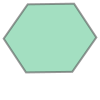

In [3]:
from vgrid.conversion.dggs2geo.dggal2geo import dggal2geo
dggal_geo = dggal2geo(dggs_type, dggal_id)
dggal_geo

### DGGAL to GeoJSON

In [4]:
import json
from vgrid.conversion.dggs2geo.dggal2geo import dggal2geojson
dggal_geojson = dggal2geojson(dggs_type, dggal_id)
print(json.dumps(dggal_geojson))

{"type": "FeatureCollection", "features": [{"type": "Feature", "id": "F7-13A8-A", "geometry": {"type": "Polygon", "coordinates": [[[106.70965553835, 10.9406422752183], [106.726966046312, 10.9144210995878], [106.74427264577, 10.8881980346408], [106.761575346388, 10.861973076306], [106.778874157826, 10.8357462205326], [106.79616908974, 10.8095174632904], [106.777489769627, 10.782795377979], [106.7588147929, 10.7560753689138], [106.740144160683, 10.7293574146626], [106.72147787402, 10.7026414938987], [106.702815933878, 10.6759275854015], [106.666854595627, 10.675453423246], [106.630890845036, 10.674982369552], [106.59492469772, 10.6745144245366], [106.558956169298, 10.6740495884166], [106.522985275398, 10.6735878614067], [106.505656394776, 10.699822352912], [106.488323610457, 10.726054993477], [106.470986912826, 10.7522857873808], [106.453646292262, 10.7785147389226], [106.43630173914, 10.804741852424], [106.4549561401, 10.83143070554], [106.473614949226, 10.8581214927003], [106.492278165

### Vector to DGGAL

<Axes: >

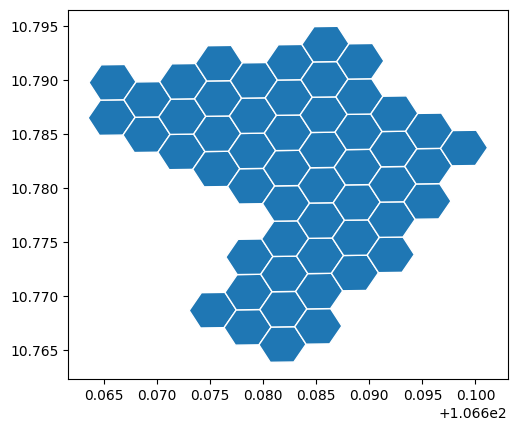

In [5]:
from vgrid.conversion.vector2dggs.vector2dggal import vector2dggal

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson"
)
vector_to_dggal  = vector2dggal(file_path, dggs_type=dggs_type, resolution=18, compact=False, 
                                predicate = "intersects",output_format="gpd")
# Visualize the output
# vector_to_dggal.head()
vector_to_dggal.plot(edgecolor="white")

### DGGAL Binning

<Axes: >

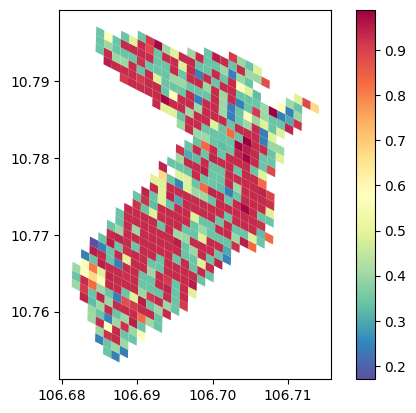

In [6]:
from vgrid.binning.dggalbin import dggalbin
dggs_type = 'isea9r'
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "majority"
dggal_bin = dggalbin(file_path,dggs_type=dggs_type, resolution=10, stats=stats, 
                numeric_field="confidence",
                # category="category",
                # method="grid",
                output_format="gpd")
# dggal_bin.head()
dggal_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)

### Raster to DGGAL

In [7]:
# from vgrid.conversion.raster2dggs.raster2dggal import raster2dggal
# from vgrid.utils.io import download_file          

# raster_url = (
#     "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
# )
# raster_file = download_file(raster_url)

# raster_to_dggal =  raster2dggal(raster_file,dggs_type="isea3h",resolution=1, output_format="gpd")
# raster_to_dggal.head()
# Visualize the output 
# import folium

# m = folium.Map(tiles="CartoDB positron", max_zoom=28)

# dggal_layer = folium.GeoJson(
#     raster_to_dggal,
#     style_function=lambda x: {
#         "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
#         "fillOpacity": 1,
#         "color": "black",
#         "weight": 1,
#     },
#     popup=folium.GeoJsonPopup(
#         fields=["zone_id", "band_1", "band_2", "band_3"],
#         aliases=["Zone ID", "Band 1", "Band 2", "Band 3"],
#         style="""
#             background-color: white;
#             border: 2px solid black;
#             border-radius: 3px;
#             box-shadow: 3px;
#         """,
#     ),
# ).add_to(m)

# m.fit_bounds(dggal_layer.get_bounds())

# # Display the map
# m

### DGGAL Generator

<Axes: >

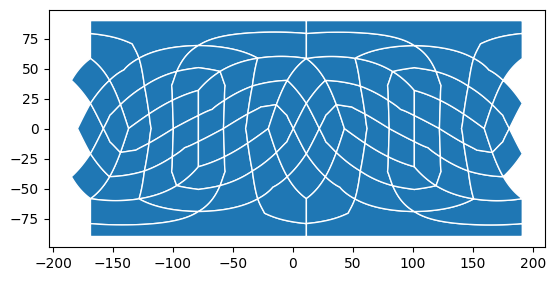

In [14]:
from vgrid.generator.dggalgen import dggalgen 

dggs_type = "isea9r" # "gnosis", "isea3h", "isea9r", "ivea3h", "ivea9r", "rtea3h", "rtea9r", "rhealpix"
resolution = 1
dggal_grid = dggalgen(dggs_type=dggs_type,resolution=resolution, output_format="gpd")
dggal_grid.plot(edgecolor="white")

### DGGAL Inspect

In [9]:
from vgrid.stats.dggalstats import dggalinspect
dggs_type = "ivea3h" # choose one from ['gnosis','isea3h','isea9r','ivea3h',
                    # 'ivea9r','rtea3h','rtea9r','rhealpix']
resolution = 3
dggal_inspect = dggalinspect(dggs_type, resolution)
dggal_inspect


geometry  zoneID     cell_area  \
0    POLYGON ((-168.8 65.34289, -167.64739 65.10319...  B0-0-D  1.573648e+12   
1    POLYGON ((-168.8 65.34289, -168.8 65.80636, -1...  B0-0-E  1.889170e+12   
2    POLYGON ((-162.08585 52.57334, -161.58833 53.0...  B0-0-F  1.889170e+12   
3    POLYGON ((-168.8 86.41452, -161.76574 86.14741...  B0-1-D  1.889150e+12   
4    POLYGON ((-168.8 86.41452, -168.8 86.89089, -1...  B0-1-E  1.889161e+12   
..                                                 ...     ...           ...   
267  POLYGON ((-165.02536 -14.17022, -164.7863 -13....  B9-7-E  1.889155e+12   
268  POLYGON ((-164.28408 -27.50412, -164.00617 -27...  B9-7-F  1.889161e+12   
269  POLYGON ((-154.32104 7.22817, -154.1105 6.752,...  B9-8-D  1.889150e+12   
270  POLYGON ((-154.32104 7.22817, -154.04875 7.705...  B9-8-E  1.889170e+12   
271  POLYGON ((-154.32104 -7.22817, -154.1105 -6.75...  B9-8-F  1.889170e+12   

     cell_perimeter  crossed  norm_area       ipq       zsc  
0      4.578743e+06     True   0.839171  0.943246  0.969712  
1      5.141869e+06    False   1.007428  0.897922  0.945835  
2      5.141822e+06    False   1.007428  0.897939  0.945844  
3      5.133181e+06     True   1.007417  0.900955  0.947431  
4      5.126934e+06    False   1.007423  0.903157  0.948588  
..              ...      ...        ...       ...       ...  
267    5.124955e+06    False   1.007420  0.903852  0.948953  
268    5.127138e+06    False   1.007423  0.903086  0.948551  
269    5.132411e+06    False   1.007417  0.901225  0.947573  
270    5.141657e+06    False   1.007428  0.897996  0.945874  
271    5.141657e+06    False   1.007428  0.897996  0.945874  

[272 rows x 8 columns]

### Distribution of DGGAL Area Distortions

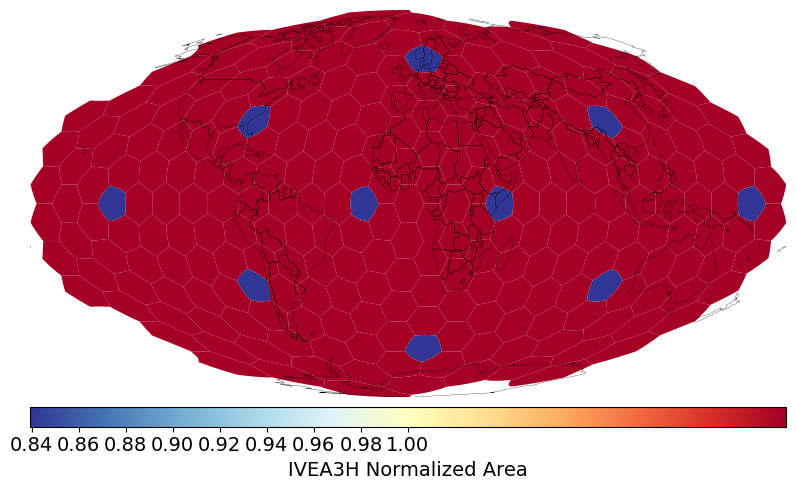

In [10]:
from vgrid.stats.dggalstats import dggal_norm_area
dggal_norm_area(dggal_inspect,dggs_type=dggs_type, crs='proj=moll')

### Distribution of DGGAL IPQ Compactness

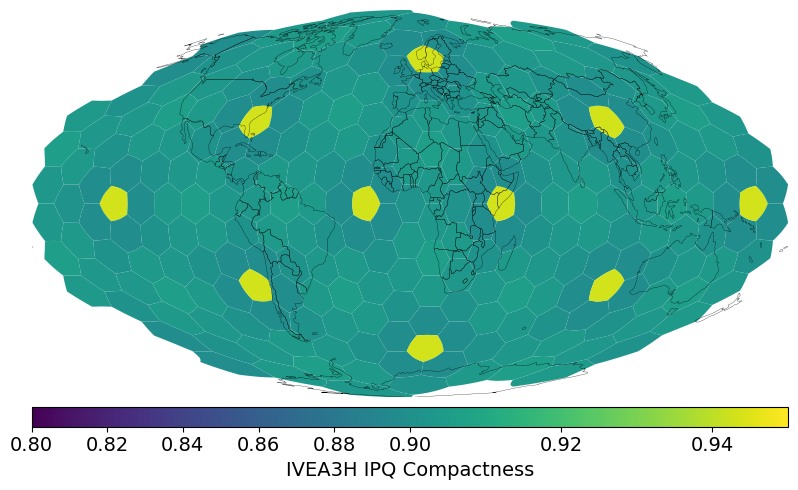

In [11]:
from vgrid.stats.dggalstats import dggal_compactness
dggal_compactness(dggal_inspect,dggs_type, crs = "proj=moll")

### DGGAL Statistics

In [1]:
from vgrid.stats.dggalstats import dggalstats    
dggs_type = 'rhealpix' # choose one from ['gnosis','isea3h','isea9r','ivea3h',
                    # 'ivea9r','rtea3h','rtea9r','rhealpix']
dggal_stats = dggalstats(dggs_type)
dggal_stats

resolution    number_of_cells  avg_edge_len_m  avg_cell_area_m2
0            0                  6    9.220138e+06      8.501094e+13
1            1                 54    3.073379e+06      9.445660e+12
2            2                486    1.024460e+06      1.049518e+12
3            3               4374    3.414866e+05      1.166131e+11
4            4              39366    1.138289e+05      1.295701e+10
5            5             354294    3.794295e+04      1.439668e+09
6            6            3188646    1.264765e+04      1.599631e+08
7            7           28697814    4.215884e+03      1.777368e+07
8            8          258280326    1.405295e+03      1.974853e+06
9            9         2324522934    4.684315e+02      2.194281e+05
10          10        20920706406    1.561438e+02      2.438090e+04
11          11       188286357654    5.204795e+01      2.708989e+03
12          12      1694577218886    1.734932e+01      3.009988e+02
13          13     15251194969974    5.783105e+00      3.344431e+01
14          14    137260754729766    1.927702e+00      3.716034e+00
15          15   1235346792567894    6.425672e-01      4.128927e-01
16          16  11118121133111046    2.141891e-01      4.587696e-02